In [8]:
using Flux
using Statistics
using Plots

In [9]:
NNODE = Chain(
    Dense(1, 32, tanh),
    Dense(32, 1)
);

In [10]:
g(m, t) = t * m([t])[1] + 1f0
g(t) = t * NNODE([t])[1] + 1f0

g (generic function with 2 methods)

In [11]:
ϵ = sqrt(eps(Float32))

# Loss with model as arg
loss(m) = mean(abs2(((g(m, t + ϵ) - g(m, t)) / ϵ) - cos(2π * t)) for t in 0:0.01f0:1f0);

In [12]:
# Optimiser + state
opt = Flux.Optimisers.Descent(0.01)
state = Flux.setup(opt, NNODE);

In [13]:
# Training loop
iter = 0
for epoch in 1:5000
    gs_tuple = gradient(NNODE) do m
        loss(m)
    end

    gs = gs_tuple[1]   # gradient for the model itself

    Flux.update!(state, NNODE, gs)

    iter += 1
    if iter % 500 == 0
        println("iter=$iter, loss=$(loss(NNODE))")
    end
end

iter=500, loss=0.4911699845847003
iter=1000, loss=0.45526178058739614
iter=1500, loss=0.3467839756844469
iter=2000, loss=0.13568217697101043
iter=2500, loss=0.029128002054878453
iter=3000, loss=0.014706545385903543
iter=3500, loss=0.011587563694739345
iter=4000, loss=0.010490063566451026
iter=4500, loss=0.009909350430967315
iter=5000, loss=0.009443787924708


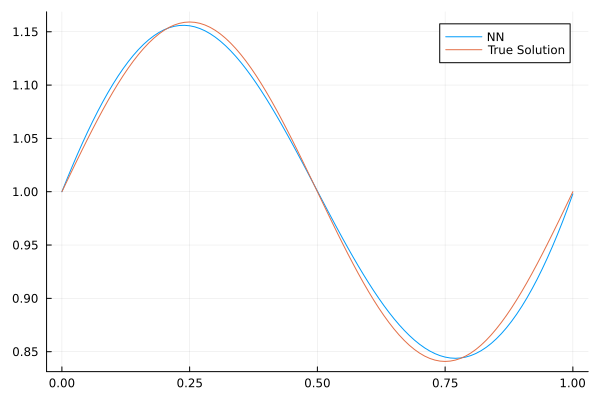

In [16]:
t = 0f0:1f-2:1f0
plot(t, g.(t), label="NN")
plot!(t,1.0 .+ sin.(2π.*t)/2π, label = "True Solution")

In [19]:
using DifferentialEquations

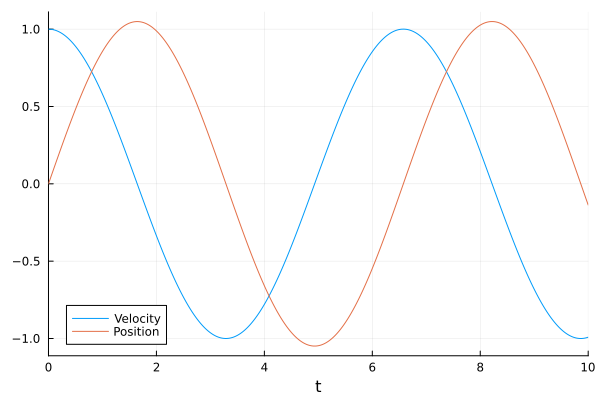

In [22]:
k = 1.0
force(dx,x,k,t) = -k*x + 0.1sin(x)
prob = SecondOrderODEProblem(force,1.0,0.0,(0.0,10.0),k)
sol = solve(prob)
plot(sol, label=["Velocity" "Position"])

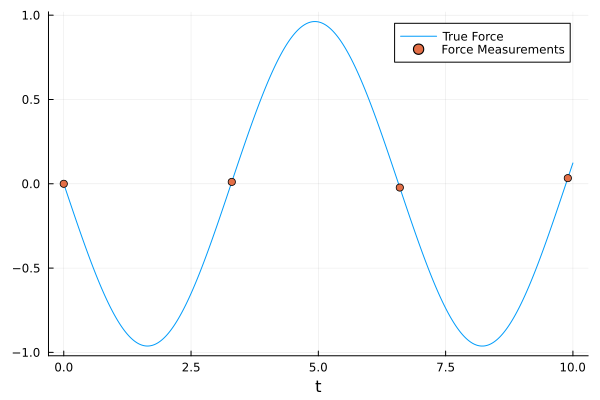

In [36]:
plot_t = 0:0.01:10
data_plot = sol(plot_t)
positions_plot = [state[2] for state in data_plot]
force_plot = [force(state[1],state[2],k,t) for state in data_plot]

t = 0:3.3:10
dataset = sol(t)
position_data = [state[2] for state in sol(t)]
force_data = [force(state[1],state[2],k,t) for state in sol(t)]

plot(plot_t,force_plot,xlabel="t",label="True Force")
scatter!(t,force_data,label="Force Measurements")
